# [TMDB 5000 MOVIES - 26]

Group Members:

Veysel Anık

Berfin Sürücü

Ahmet Ömer Kayabaşı

Yağız Turan

Emin Baybars Timur


## Introduction

<font color="hotpink">
We are living in a time where movies are seemingly more popular and attractive than written sources such as books, which makes movies much more profitable than any other media source. This project includes the collection of TMDB 5000 Movies and their relationships. Our aim is to determine different conclusions on frequencies and features of movies. We have a dataset that is collected from a long span of dates but there are a few movies entered into data compared to recent data. So we may need to clear this accordingly in order to deduce the spread (resulted in more skewed data). Afterward, the dataset needs to be examined and mined by the group members regarding its budget, ratings, popularity, genres, title, cast, and crew(by the features of the dataset). Lastly, the project will be finished with a discussion of the descriptive results and possible future works about the ML model.
</font>

### Problem Definition

<font color="royalblue">
In order to achieve the goal of this project, our main goal is to predict the revenues according to the other features of the dataset (country, language, budget, popularity, votes, etc.). In our data, the goal is planning to use some of the statistical methods like z-score testing, hypothesis testing and pearson correlation tests to figure out and choose the features and eliminate the unrelated ones, signifying different relationships and finding out relevance and dependence between the features and samples. In order to achieve the goal of this project, members will use feature engineering and statistical methods to detect these kinds of relationships. After cleaning, and selecting the right type and amount of features, we will start designing our model. While designing our model, we will re-check the previously calculated selections and do further changes depending on the results of our model. In the end, our purpose is to create the best model, that has low bias and low variance between the data, and has the least error score. Also we will try our model to be applicable to new data.
</font>

### Utilized Datasets

<font color="hotpink">
Kaggle Dataset: ​https://www.kaggle.com/tmdb/tmdb-movie-metadata 

IMDb Dataset: https://www.kaggle.com/ashirwadsangwan/imdb-dataset?select=title.ratings.tsv.gz
</font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import special
from os.path import join
import seaborn as sns

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount("./drive", force_remount=True)

path_prefix = "./drive/My Drive/"

Mounted at ./drive


In [ ]:
import json
def load_tmdb_movies(path):
    df = pd.read_csv(path)
    df['release_date'] = pd.to_datetime(df['release_date']).apply(lambda x: x.date())
    json_columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df

def load_tmdb_credits(path):
    df = pd.read_csv(path)
    json_columns = ['cast', 'crew']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df

def pipe_flatten_names(keywords):
    return '|'.join([x['name'] for x in keywords])

In [ ]:
keywords_path = "movie_metadata_with_keyword_features.csv"
df_kw = pd.read_csv(join(path_prefix, keywords_path))

df_kw = df_kw[["movie_title","plot_keywords","language", "country", "director_facebook_likes", "actor_3_facebook_likes", "num_voted_users", 
                "content_rating","actor_1_facebook_likes", "actor_2_facebook_likes", "actor_3_facebook_likes",
                 "cast_total_facebook_likes","movie_facebook_likes","imdb_score", "aspect_ratio", "budget"]]
df_kw.rename(columns={"budget":"budget_2"},inplace= True)
df_kw.head(2)
df_kw.rename(columns= {"movie_title": "title"}, inplace = True)

FileNotFoundError: ignored

In [ ]:
path = "tmdb_5000_movies.csv"
path_2 = "tmdb_5000_credits.csv"
df= load_tmdb_movies(join(path_prefix, path))
df_credits = load_tmdb_credits(join(path_prefix, path_2))

In [ ]:

df_stacked =pd.concat([df, df_kw, df_credits], keys=["title","title","title"],axis= 1,
                      join = "inner")

df_stacked = df_stacked.droplevel(0, axis=1)



In [ ]:
print(df_stacked.shape)

In [ ]:

ax =df_stacked.hist(figsize= (10,15))
plt.title("Initial Visualization of Numerical Data")
plt.tight_layout()

## Data Exploration and Dataset Concatenation


#### Checking the similarities by the budget values which is similar.

In [ ]:
df_stacked.boxplot(column = ["budget", "budget_2"])
plt.title("Budget values of two separated datasets:")

From this dataset, we see some budget_2 data that are above the 400 Million  that are not in budget data, So we subtract them and check the spread of two data.

In [ ]:
print("No. of budget values that are bigger than 400Million for budget_1"
,df_stacked.loc[df_stacked.budget > 0.4*(10**9)]["budget"].count())

print("No. of budget values that are bigger than 400Million for budget_2"
,df_stacked.loc[df_stacked.budget_2 > 0.4*(10**9)]["budget"].count())

In [ ]:
df_stacked = df_stacked.loc[df_stacked.budget_2 < 0.4*(10**9)]

In [ ]:
df_stacked.boxplot(column = ["budget", "budget_2"])
plt.title("budget values that are taken from similar but different datasets", fontdict = {"fontsize":"large"})

#### Applying a sample t test for checking the similarity of the budget distributions.

    H0: Confidence level coming from t-stat of two samples is above 90%
    H1: Confidence level is below 90% 

In [ ]:
sns.kdeplot(df_stacked.budget, color = "red")
sns.kdeplot(df_stacked.budget_2, color = "blue")

In [ ]:
import scipy.stats as stats
sample1 = df_stacked.budget
sample2 = df_stacked.budget_2
t_stat, p_val = stats.ttest_ind(sample1, sample2, equal_var=False)
print("Degrees of freedom: 2")
print(f"Our abs value of t stat: {round(abs(t_stat),4) }")

print("Our confidence level is apprx. 95.6%")
print("We accept the null hypothesis")

From the t score, we check the t table and see that we have more than 95% confidence between two samples of budget values. So we will keep the concatenated data.

In [ ]:
del df_stacked["budget_2"]

## Intro to  analysis

#### Initial feature elimination -Getting rid of the unnecessary features-

In [ ]:
df_stacked.columns

In [ ]:
del df["homepage"], df["original_title"], df["tagline"], df["status"],df["overview"]

In [ ]:

df_num = df_stacked[[ "release_date", "runtime", "popularity","vote_average", "vote_count", "budget", "revenue",
                     'director_facebook_likes', 'num_voted_users','actor_3_facebook_likes',
                     'actor_1_facebook_likes', 'actor_2_facebook_likes',
                     'cast_total_facebook_likes',
                     'movie_facebook_likes', 'imdb_score', 'aspect_ratio', "genres", "production_companies", "keywords",
                     "language", "country",'content_rating', 'crew','cast']]

import datetime as datetime
pd.to_datetime(df_stacked["release_date"])
df_num['year'] = pd.DatetimeIndex(df_stacked['release_date']).year
df_num["age"] = pd.datetime.now().year - df_num["year"]
df_num.drop(columns = ["release_date", "year"], inplace= True)
df_num = df_num.loc[:,~df_num.columns.duplicated()]


In [ ]:
df_num.hist(figsize=(15, 15), bins = 20)
plt.show()

Let's check our revenue and budget values whether they have any NaN values:

In [ ]:
print(f"The No. of NaN values for Revenue:  {df_num.loc[df_num.revenue == 0].revenue.count()}")
print(f"The No. of NaN values for Revenue:  {df_num.loc[df_num.budget == 0].budget.count()}")

Wooah, there are more empty values than I thought, so we might think to fill them with the mean or median. If the data is skewed, we will fill it with the *MEDIAN* of the dataset.

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize =(9,4))
ax1 = sns.histplot(df_num.revenue, bins = 30, ax= ax1)
ax2 = sns.histplot(df_num.budget,bins = 30, ax = ax2)
plt.suptitle("Distribution Graphs for Revenue and Budget")

We fill all the empty revenue and budget values with the median of the data as both data are highly right skewed.

In [ ]:
revenue_median = df_num['revenue'].median()
budget_median = df_num['budget'].median()

df_num['revenue'].replace(0, revenue_median, inplace = True)
df_num['budget'].replace(0, budget_median, inplace = True)

In [ ]:
print(f"The No. of NaN values for Revenue:  {df_num.loc[df_num.revenue == 0].revenue.count()}")
print(f"The No. of NaN values for Budget:  {df_num.loc[df_num.budget == 0].budget.count()}")

We also delete the movies whose revenues and budgets are less than 1K. I am depending this number to the ınformation I gained by wikipedias low budget films:

 In 1998, Christopher Nolan's first film Following was filmed on a budget of £3,000. Nolan then received another £3,000 to "blow it up to 35mm". Also we have double checked the movie prices that contributes to this dataset, and we decided that minimum price that could be investigated should be 1000.

In [ ]:
print("Movies whose gross are less than 1000: ",df_num.loc[df_num.revenue < 1000]["revenue"].count())
print("Movies that are cheaper than 1000: ", df_num.loc[df_num.budget < 1000]["budget"].count())

In [ ]:
df_num = df_num.loc[(df_num.revenue >= 1000) & (df_num.budget >= 1000)]

In [ ]:
df_num.isnull().sum()

Taking out the null values of the remaining features:



*   facebook_likes of actors: drop all NaN's
*   aspect_ratio: We'll will fill them with relevant number
*   Content_rating: We'll fill them with most frequent number
*   age and runtime: There is only one for each, so drop them



In [ ]:
#dropping some nans
df_num.dropna(axis =0 , how = 'any',subset = ["age", "runtime", "actor_1_facebook_likes",  "actor_2_facebook_likes", "actor_3_facebook_likes", "director_facebook_likes"], inplace = True)

In [ ]:
for i in ["age", "runtime", "actor_1_facebook_likes",  "actor_2_facebook_likes", "actor_3_facebook_likes"]:
  print(df_num[i].isnull().sum())

Now we will do some calculations on aspect_ratio, we will check its distribution. If it is skewed, we will fill the empty values with the median else with mean.

In [ ]:
sns.kdeplot(df_num.aspect_ratio)

In [ ]:
aspect_ratio_median = df_num["aspect_ratio"].median()
df_num["aspect_ratio"] = df_num['aspect_ratio'].fillna( aspect_ratio_median)

print(df_num.aspect_ratio.isnull().sum())

In [ ]:
ratings_list = df_num.content_rating.value_counts().index
ratings_list

Our most frequent rating is "R" rating means Restricted, which may not be right for some of the NaN values, the 'Approved' is a more general term, and in order to reduce overfitting, We will fill the content rating NaNs with "Approved":

In [ ]:
df_num["content_rating"].fillna("Approved", inplace = True)
df_num.content_rating.isnull().sum()

We have handled all the null values but we didn't subtract some of the similar and redundant features with some possible data leakage problems. Let's keep our foolest dataset for starting.

In [ ]:
df_foolest = df_num

## Feature Analysis and Dimensionality Reduction (if necessary) of the Numerical Features

### Let's make a Feature Analysis and Detect our features that are dependent or redundant for our model.

Next, we compare the correlation between features and remove if one of two features that have a correlation higher than 0.9. By doing this:


*   We are checking whether there are more than one features that are dependent to each other and that effects our expected value in a very similar manner.




In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric= df_num.select_dtypes(include=numerics)
corr = df_numeric.corr()

In [ ]:

columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.95:
            if columns[j]:
                columns[j] = False
                

selected_columns = df_numeric.columns
#those are the columns that has passed the test.

df_numeric = df_numeric[selected_columns]
# take the list of columns that has passed the test

df_numeric.head()

In [ ]:
for i in  df_num.columns:
  if np.issubdtype(df_num[i].dtype, np.number):
    if i not in selected_columns:
      print(f"{i} should be deleted from df_nums")

We have found that the _cast_total_facebook_likes_ is a redundant value according to our dependancy test. It means that we have another feature of whose distribution is quite similar to this feature. Therefore we delete this from our main dataframe.

In [ ]:
#df_num.drop("cast_total_facebook_likes", inplace= True)

In [ ]:
selected_columns_1 = selected_columns.drop("revenue")

In [ ]:
df_numeric = df_numeric.fillna(method='ffill')

### Initial Feature Selection with Backward Elimination

Pearson's r formula for Correlation:

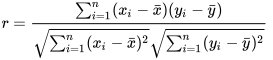

It seems there are no significantly dependent variables from the correlation values. Now we should select the columns based on how they effect the p-value.
Our null hypothesis is:

    H0 (Null hypothesis): The selected combination of the dependent variables do not have any effect on the independent variable.
    H1 (Alternative hypothesis): The selected combination of the dependent variables 

We will build a small regression model to further calculate the p values.
The p-values that are higher than the threshold, in this case it will be 0.4, will be discarded from the features. Because they refuse to reject the null hypothesis.

- In short, we are taking out the variables that contribute the least to *revenue*.

In [ ]:

import statsmodels.api as sm

def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

x= df_numeric.loc[:, df_numeric.columns != "revenue"].values
Y = df_numeric.loc[:, df_numeric.columns == "revenue"]

SL = 0.4  #significance level

veri_modeled, selected_cols = backwardElimination(x, Y .values,
                                                     SL, selected_columns_1)

Convert the result to a dataframe:

In [ ]:
result = pd.DataFrame()
result["revenue"] = df_numeric.iloc[:, 5]

In [ ]:
data = pd.DataFrame(data = veri_modeled, columns = selected_cols)

In [ ]:
fig = plt.figure(figsize = (15, 20))
j = 0
idx = 0
for i in data.columns:
    plt.subplot(6,4 , j+1)
    j += 1
    sns.scatterplot(data[i], result["revenue"] , color='g', label= "revenue_distribution")
    plt.legend(loc='best')
    plt.xlabel(selected_cols[idx])
    idx += 1
fig.suptitle('Revenue Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [ ]:
elim_cols = []
for i in  df_num.columns:
  if np.issubdtype(df_num[i].dtype, np.number):
    if (i not in selected_cols) & (i != "revenue"):
      print(f"{i} should be deleted from df_nums")
      elim_cols.append(i)

The features that failed to reject our null hypothesis were:


*   actor_2_facebook_likes
*   imdb_score
*   aspect_ratio

So we need to understand the relationship of those guys with our target value. Let's apply some statistical tests to check whether we really should take those values out.

In [ ]:
from scipy.stats import pearsonr, spearmanr

for i in elim_cols:
  coef_pear,p_pear = pearsonr(df_num[i] , df_num["revenue"])
  print(f"The Pearson Correlation between {i} and revenue is: {round(coef_pear,4)}")

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3 ,figsize = (12,4))

ax1 = sns.distplot(df_num["aspect_ratio"], ax = ax1)
ax2 = sns.distplot(df_num["imdb_score"], ax = ax2)
ax3 = sns.distplot(df_num["actor_2_facebook_likes"], ax = ax3)
fig.tight_layout()


We see that those two values namely "imdb_scores" and "vote_average" are remarkably similar, so one is redundant for our model. Let's check which one is more correlated by pearson correlation test.

#### Clear the numerical data and take the outliers of:

*   vote_average
*   popularity
*   runtime


#### The spread of the vote_average, popularity and runtime values.

In [ ]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(10,5))
ax1 = df_num[["vote_average"]].boxplot(ax =ax1)
ax2 = df_num[["popularity"]].boxplot(ax = ax2)
ax3 = df_num[["runtime"]].boxplot(ax = ax3)

Our popularity values seems OK but in *vote average* and *runtime* values we have some problematic values. 

*   We should keep the runtime values on the upper limit but delete the ones below the lower limit
*   we should delete the outliers of the vote averages.



### More data cleaning of Numerical Values:

#### Correlation analysis of:



*   
<font color='green'>*imdb_score*
</font> and <font color='green'>
 *vote_average*
 </font>
*   <font color = 'orange'>*num_voted_users*</font> and
 <font color = 'orange'> *vote_count* </font>

We are going to check the variation between them and if the variation is so small, then we will take out one of them which contributes the least to the target value. So we'll do correlation analysis afterwards.

IMDB scorea nd vote_average

In [ ]:
fig,(ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1 = sns.distplot(df_num.imdb_score,ax = ax1)
ax1 = sns.distplot(df_num.vote_average,ax=ax1)
ax1.set_title("The distribution of two similar data (imdb score and vote average)")

ax2 = df_num.boxplot(column = ["vote_average", "imdb_score"])
ax2.set_title("Boxplot distribution of two similar data (imdb score and vote average)")
fig.tight_layout()

IMDB score seems to be more normal and includes less outliers in the data, So let's check those two features' relevance with the revenue data before taking out the outliers.


In [ ]:
import scipy.stats as stats
sample1 = df_num.vote_average
sample2 = df_num.imdb_score
t_stat, p_val = stats.ttest_ind(sample1, sample2, equal_var=False)
print("Degrees of freedom: 2")
print(f"Our abs value of t stat: {round(abs(t_stat),4) }")

print("Our confidence level is apprx. 99% (from the t-table)")
print("We accept the null hypothesis")

In [ ]:
vote_average = df_num["vote_average"]
imdb = df_num["imdb_score"]
revenue = df_num["revenue"]
coef_1, p_1 = pearsonr(vote_average, revenue)
coef_imdb, p_imdb = pearsonr(imdb, revenue)

if coef_1 > coef_imdb:
  print(f"Coef of imdb with revenue: {round(coef_imdb,4)}")
  print(f"Coef of vote_average with revenue: {round(coef_1,4)}")

  print(f"Coefficient of vote_average is bigger than coefficient of imdb_scores, so imdb_score feature will be deleted.")

In [ ]:
corr = df_num[["imdb_score", "vote_average", "revenue"]].corr()
corr

Hmmm, we seem to have more correlation with vote_average and revenue, we will check the correlation again after taking out the outliers of the vote_average values (values of 0 and 10 in _vote_average_ data)

This graph is showing that the movies that took more votes seems to have more revenue, so let's test the dependency of the vote_count and revenue values with a independence test.



> Vote_count and num_voted_users

In this case, we have different scaled data. So let's check how to rescale our num_voted_users feature.

In [ ]:
print(df_num.num_voted_users.mean())
print(df_num.vote_count.mean())
print(df_num.num_voted_users.mean()/100)

By calculation of means, I decided to divide num_voted_users to 100 to get a better approximate.

In [ ]:
fig,(ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1 = sns.distplot(df_num.num_voted_users /100,ax = ax1)
ax1 = sns.distplot(df_num.vote_count,ax=ax1)
ax1.set_title("The distribution of two similar data (num voted users and vote_count)")
ax1.set_label(["df_num_voted", "vote_count"])

df_num["num_voted_users"] = df_num["num_voted_users"] / 100 
ax2 = df_num.boxplot(column = ["num_voted_users", "vote_count"])
ax2.set_title("Boxplot distribution of two similar data (num voted users and vote_counts)")
fig.tight_layout()

We have a more tidy data for vote_count, let's check the correlation between the target:

In [ ]:
corr = df_num[["num_voted_users", "vote_count", "revenue"]].corr()
corr

As the revenue is much more correlated with vote_count, we will stick to that.

In [ ]:
df_num.drop(columns= "num_voted_users", axis = 0, inplace= True)

We see that correlation between vote_average and revenue is much more bigger than the correlation between imdb_score and revenue. So we will keep the vote_average values for teaching the model.

#### Z score test for outlier detection and removal for vote_average and runtime values.

In [ ]:
df_num["votes_z"] = stats.zscore(df_num["vote_average"])

df_num["runtime_z"] = stats.zscore(df_num["runtime"])


df_vote_outliers = df_num.loc[(df_num["votes_z"] > 5) | (df_num["votes_z"] < -5)]

df_runtime_outliers = df_num.loc[(df_num["runtime_z"] > 3) | (df_num["runtime_z"] < -3)]
df_runtime_outliers_2 = df_num.loc[(df_num["runtime_z"] > 3)]

print("No. of outliers in vote_average: ", df_vote_outliers["vote_average"].count())

print("No. of outliers in runtime: (both sides) ",df_runtime_outliers["runtime"].count())
print("No. of outliers in runtime: (only right side) ",df_runtime_outliers_2["runtime"].count())


In [ ]:
df_num = df_num.loc[(df_num["runtime_z"]> -3)]
df_num = df_num.loc[(df_num["votes_z"]> -4) & (df_num["votes_z"] < 3)]
print("Minimum Average Score: ", df_num.vote_average.min())
print("Maximum Average Score: ", df_num.vote_average.max())

#drop the z_scores columns from the df_num
df_num.drop(columns = ["votes_z", "runtime_z"],inplace = True)


In [ ]:
sns.distplot(df_num.vote_average)
plt.title("Frequency of votes in data")
plt.xlabel("Vote_average")
plt.ylabel("Count")




> Now our vote_average data is much less skewed and closer to Gaussian Distribution and which is a thing that we want while we do scaling in our numerical data.


> Having seen that the highest average in the IMDB movies are neaerly 9.3 and smallest average is 1.9 ; I am choosing such points between those by the z-score outlier elimination technique.



#### Let's investigate the relationship between the frequency and average of votes and revenues

In [ ]:
corr_votes = df_num[["imdb_score", "vote_average", "revenue"]].corr()
heatmap = sns.heatmap(corr_votes, vmin=0, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':9}, pad=8);

In [ ]:
import matplotlib.ticker as mtick


def numfmt(x, pos):
  if x < 1000000000:
    return '$%.1f Million Dolars' % (x/1000000)
  else:
    return '$%.1f Billion Dolars' % (x/1000000000)

rev_data = df_num.revenue
ylocs = np.linspace(0, rev_data.max(), 8)
labels = [f"{value}" for value in ylocs]

yfmt = mtick.FuncFormatter(numfmt)

fig,ax1 = plt.subplots(figsize = (10,10))

hue = pd.cut(df_num.vote_count, [0,100,1000,3000,10000,15000])
ax1 = sns.scatterplot(x = df_num["vote_average"], y = df_num["revenue"],size = df_num["budget"], hue = hue,alpha = 0.6)

plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
ax1.set_yticks(ylocs)
ax1.set_yticklabels(labels)
ax1.yaxis.set_major_formatter(yfmt)

plt.grid()
plt.show()


## Categorical Data Analysis



> Before we dive into the categorical analysis, I want to create a fool_dataframe that contains only the numerical initial features tailored by the EDA, so that we will have more than 1 dataset to check the bias-variance tradeoffs of our models.



In [ ]:
df_fool = df_num[['runtime', 'popularity', 'vote_average', 'vote_count', 'budget',
       'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'movie_facebook_likes', 'age','revenue']]

Boxplots that shows reveue distribution among the most frequent genres and production companies.

#### Organizing the categorical data

Making genre values one hot labeled in order to put them into the model.

Doing  encoding in order to create more numerical variables from categorical attributes for our model. We will evaluate their correlation with the independent variable later.



*   One-hot encoding of Genres
*   Binary encoding of Spoken Language
*   One-hot encoding of (most frequent) keywords
*   Label or binary encoding of countries from 2nd dataset.

We will take out some of those features, in order not to overfit our model, and also for having more accurate results.


We are going to limit the features we choose from the categorical data as we have lots of them and we need to find the optimal feature selection in order not to overfit and to increase our model's accuracy at the same time. So we choose to use one-hot encoding of the categorical values as:


*   Most frequent 50 keywords
*   All 20 genres
*   Most frequent 10 production companies
*   Most frequent 100 actrors or actresses


One hot encoding of keywords:

In [ ]:
from pandas.io.json import json_normalize
import json

def column_decode(data,key):
    result = []
    for item in data: #convert to list from json
        result.append(item[key])
    return result

df_num.genres = df_num.genres.apply(column_decode,key='name')
df_num.production_companies = df_num.production_companies.apply(column_decode,key='name')
df_num.keywords = df_num.keywords.apply(column_decode,key='name')
df_num.crew = df_num.crew.apply(column_decode, key= "name")
df_num.cast = df_num.cast.apply(column_decode, key= "name")

In [ ]:
keyword_counts = dict()

for item in df_num.keywords:
  for kw in item:
    if kw not in keyword_counts.keys():
      keyword_counts[kw] = 1
    else:
      keyword_counts[kw] += 1


production_counts = dict()

for item in df_num.production_companies:
  for pc in item:
    if pc not in production_counts.keys():
      production_counts[pc] = 1
    else:
      production_counts[pc] += 1

genre_counts = dict()

for item in df_num.genres:
  for genre in item:
    if genre not in genre_counts.keys():
      genre_counts[genre] = 1
    else:
      genre_counts[genre] += 1

cast_counts = dict()

for item in df_num.cast:
  for actor in item:
    if actor not in cast_counts.keys():
      cast_counts[actor]  = 1
    else:
      cast_counts[actor] += 1


In [ ]:
#keyword count df
kw_df = pd.DataFrame(keyword_counts.values(),keyword_counts.keys()).sort_values(by = 0,ascending = False)
freqKeyword = kw_df.head(50)
keyword_liste = freqKeyword.head(50).index
#company count df
pc_df = pd.DataFrame(production_counts.values(),production_counts.keys()).sort_values(by = 0,ascending = False)
freqComp = pc_df.head(10)
company_liste = freqComp.index
#genre count df
genre_df = pd.DataFrame(genre_counts.values(), genre_counts.keys()).sort_values(by = 0,ascending = False)
freqgenre = genre_df
genre_liste = genre_df.index

#cast count df
cast_df = pd.DataFrame(cast_counts.values(), cast_counts.keys()).sort_values(by = 0, ascending = False)
freqcast = cast_df.head(100)
cast_liste = freqcast.index

In [ ]:
count = 0
for cast in df_num.cast:
  for actor in cast_liste:
    if actor in cast:
      count += 1
      break
    else:
      pass

print(f"Ratio of most frequent 50 cast, appearing on the movies data is: {round( count /df_num.shape[0],3)}")

In [ ]:
for keyword in keyword_liste:
  one_hot_liste = []
  for row in df_num.keywords:
    one_hot_liste.append(1 if keyword in row else 0)
  
  df_num[keyword] = one_hot_liste

for comp in company_liste:
  one_hot_liste = []
  for row in df_num.production_companies:
    one_hot_liste.append(1 if comp in row else 0)
  
  df_num[comp] = one_hot_liste

for genre in genre_liste:
  one_hot_liste = []
  for row in df_num.genres:
    one_hot_liste.append(1 if genre in row else 0)
  df_num[genre] = one_hot_liste

for cast in cast_liste:
  one_hot_liste = []
  for row in df_num.cast:
    one_hot_liste.append(1 if cast in row else 0)
  df_num[cast] = one_hot_liste

In [ ]:
df_num.shape

    Binary encoding of Language Feature

In [ ]:
language_binary = np.where(df_num.language == "English", 1, 0)

df_num["isEnglish"] = language_binary

df_num["isEnglish"].value_counts().plot.barh()


In [ ]:
df_num.iloc[:5, :7]

In [ ]:
df_num.iloc[:, 73:83]

In [ ]:
df_comps = df_num.iloc[:, 73:83]
df_comps["revenue"] = df_num["revenue"]
corr_comps = df_comps.corr()
plt.figure(figsize=(8,8))

heatmap = sns.heatmap(corr_comps, vmin=0, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap of Production Companies', fontdict={'fontsize':9}, pad=8);

From this correlation map, we see that Walt Disney, Warner Bros and 20th Century Fox Film Corporation has relatively higher correlation with the target feature "revenue". Considering that those companies are the ones who dominate the film sector, our data is giving us sensible information. But two companies have surprising. The "Universal Pictures" and "Paramount Pictures". I would expect more correlation with revenue from this companies. Let's visualize these relations with a bar graph.

In [ ]:
compDict = {x:[0,0,0] for x in df_num.iloc[:, 73:83].columns}

for index, row in df_num.iterrows():
    
    for comp in compDict.keys():

      if row[comp] == 1:
        compDict[comp][0] += row['revenue']
        compDict[comp][1] += 1
        compDict[comp][2] += row['budget']

for key,value in compDict.items():
  value.append(round(value[0] / value[1]))
  value.append(round(value[2] / value[1]))



In [ ]:
comp_df = pd.DataFrame(compDict.values(),compDict.keys())
comp_df.columns = ["Total Revenue","Total Movies","Total Budget","Mean Revenue", "Mean Budget"]

comp_df = comp_df.sort_values(by = 'Mean Revenue', ascending = False)

comp_df

In [ ]:

xlabels = comp_df.index
ylocs = np.linspace(0, comp_df['Mean Revenue'].max(), 10)

labels = [f"${round(value/ 100000000)} M" for value in ylocs]

w = 0.02
x = np.arange(0,30,3)
# creating the bar plot 
fig, ax = plt.subplots(figsize = (20,10))

ind = np.arange(10)
width= 0.2

rects1 = ax.bar(ind - width/2, comp_df["Mean Revenue"], width,
                label='Mean Revenue')
rects2 = ax.bar(ind + width/2, comp_df["Mean Budget"], width,
                label='Mean Budget')

font= {'family': 'timesnewroman',
        'color':  'royalblue',
        'weight': 'normal',
        'size': 25,
        }

font_2 = {'family': 'timesnewroman',
        'color':  'olive',
        'weight': 'normal',
        'size': 12,
        }    
  
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Revenues and Budgets')
ax.set_title('Mean Revenues and Mean Budgets of companies', fontdict = font)
ax.set_xticks(ind)
ax.set_xticklabels(comp_df.index, fontdict = font_2, rotation = 20)
ax.legend()


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('${} M'.format(round(height/1000000, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects1, "left")
autolabel(rects2, "right")

fig.tight_layout()


plt.show()

Another significant categorical data we have is our genre data. We have obtained this genre data by multilabel encoding them as binary features -namely one hot encoding-. So let's take a look of the features' correlation with the revenue.

In [ ]:
df_genres = df_num.iloc[:, 83:103]
df_genres["revenue"] = df_num["revenue"]
corr_genres = df_genres.corr()
plt.figure(figsize=(14,12))

heatmap = sns.heatmap(corr_genres, vmin=0, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap of Genres', fontdict={'fontsize':9}, pad=8);

The most correlated genre with revenue seems to be Adventure. These correlations are coherent with the statista's data analysis of movie genre and revenue relationship. Adventure followed by Action movies has the lead for the revenue. 

(For statista's website:https://www.statista.com/statistics/188658/movie-genres-in-north-america-by-box-office-revenue-since-1995/)

In [ ]:
genreDict = {x:[0,0,0] for x in df_num.iloc[:, 83:103].columns}

for index, row in df_num.iterrows():
    
    for comp in genreDict.keys():

      if row[comp] == 1:
        genreDict[comp][0] += row['revenue']
        genreDict[comp][1] += 1
        genreDict[comp][2] += row['budget']

for key,value in genreDict.items():
  value.append(round(value[0] / value[1]))
  value.append(round(value[2] / value[1]))

genre_df = pd.DataFrame(genreDict.values(),genreDict.keys())
genre_df.columns = ["Total Revenue","Total Movies","Total Budget","Mean Revenue", "Mean Budget"]

genre_df = genre_df.sort_values(by = 'Mean Revenue', ascending = False)

In [ ]:
genre_df

In [ ]:

xlabels = genre_df.index
ylocs = np.linspace(0, genre_df['Mean Revenue'].max(), 10)

labels = [f"${round(value/ 100000000)} M" for value in ylocs]

w = 0.02
x = np.arange(0,30,3)
# creating the bar plot 
fig, ax = plt.subplots(figsize = (25,10))

ind = np.arange(20)
width= 0.2

rects1 = ax.bar(ind - width/2, genre_df["Mean Revenue"], width, label='Mean Revenue')
rects2 = ax.bar(ind + width/2, genre_df["Mean Budget"], width, label='Mean Budget')

font= {'family': 'Courier New',
        'color':  'royalblue',
        'weight': 'bold',
        'size': 25,
        }

font_2 = {'family': 'Times New Roman',
        'color':  'olive',
        'weight': 'normal',
        'size': 14,
        }    
  
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Revenues and Budgets')
ax.set_title('Mean Revenues and Mean Budgets of Genres', fontdict = font)
ax.set_xticks(ind)
ax.set_xticklabels(genre_df.index, fontdict = font_2, rotation = 20)
ax.legend()


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('${} M'.format(round(height/1000000, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects1, "left")
autolabel(rects2, "right")

fig.tight_layout()


plt.show()


### Statistical analysis of correlance between spoken language and revenue

    H0: feature (spoken language) and target(revenue) are independent
    H1: feature and target are not independent


In [ ]:
x = df_num["isEnglish"]
y = df_num["revenue"]

from scipy.stats import pearsonr

coef, p = pearsonr(x,y)
print(f"The correlation coefficient is: {round(coef,4)}, and the p value is: {round(p,11)}")

As the p-value is bigger than 0.05, we reject the null hypothesis and can conclude that there is a weak but dependent correlation between those features.

In [ ]:
langDict = {"isEng":[0,0,0], "notEng":[0,0,0]}
for index,row in enumerate(df_num.isEnglish):
  if row == 1:
    langDict["isEng"][0] += df_num.revenue.iloc[index]
    langDict["isEng"][1] += df_num.budget.iloc[index]
    langDict["isEng"][2] += 1
  else:
    langDict["notEng"][0] += df_num.revenue.iloc[index]
    langDict["notEng"][1] += df_num.budget.iloc[index]
    langDict["notEng"][2] += 1

for key, value in langDict.items():
  value.append(round(value[0]/value[2])) #mean revenue
  value.append(round(value[1]/value[2]))  # mean budget

lang_df = pd.DataFrame(langDict.values(),langDict.keys())
lang_df.columns = ["Total Revenue","Total Budget", "Counts", "Mean Revenue", "Mean Budget"]



In [ ]:
lang_df

In [ ]:
fig, ax = plt.subplots(figsize = (8,4))

ind = np.arange(2)
width= 0.2

rects1 = ax.bar(ind - width/2, lang_df["Mean Revenue"], width,
                label='Mean Revenue')
rects2 = ax.bar(ind + width/2, lang_df["Mean Budget"], width,
                label='Mean Budget')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Revenues and Budgets')
ax.set_title('Total and Mean Revenues and Budgets')
ax.set_xticks(ind)
ax.set_xticklabels(("English as main language", "Not English"))
ax.legend()


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('${} M'.format(height/1000000),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects1, "left")
autolabel(rects2, "right")

fig.tight_layout()

plt.show()

#### Clustering of Genres

We have total 20 genres, some of them are very similar to each other, let's see if we can do clustering on those 20 features?



In [ ]:
df_genres.head()

In [ ]:
X_genre = df_genres.iloc[:, :-1]

#### Componnent analysis with Factor analysis

In [ ]:
from sklearn.decomposition import FactorAnalysis

factor = FactorAnalysis(n_components=5, random_state=101).fit(X_genre)
genr_cols = df_genres.columns
genr_cols = genr_cols.drop("revenue")

nice_2 = pd.DataFrame(factor.components_, columns = genr_cols)
nice_2

#### component anaylsis with PCA

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
pca = PCA().fit(X_genre)
print("Explained variance by component: %s" % pca.explained_variance_ratio_)
nice = pd.DataFrame(pca.components_,columns=genr_cols)

nice.head()

## Machine Learning Models

<font color="purple">
This is the section that you primarily need work on for the final report. Implement at least two machine learning models so that you can compare them.
</font>

We might create two models, one is a regression prediction problems with different models and the other is a classification problem by stratifiying the revenue data. 

Also we should keep a data that only contains the continuous relative data as our basic model to check the significances of our more complicated model.(Baybars)

### Our Target Value is *Revenue*. So we will take it to y before we start to build our machine learning algorithm.

### Implementation

<font color="blue">
Implement and evaluate your models. Perform hyperparameter tunning if necessary. Choose the correct evaluation metrics.
</font>

### Determining Training, Test and Validation Sets:

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import  LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

pd.set_option('display.max_columns', None)  # Unlimited columns.
pd.options.mode.use_inf_as_na = True        # Any inf or -inf is 
                                            # treated as NA.

This function will help us to see and evaluate our results by giving us both the train set and test set errors. We used RMSE (root mean squared error) for calculating the errors  and we will use r2_score for the performance score.

In [ ]:
results = []
def performance_measures(model, store_results=True):    
    train_rmses = cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
    train_rmses *= -1
    train_mean_rmse = np.mean(train_rmses)
    
    test_rmses = cross_val_score(model, X_test, y_test, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
    test_rmses *= -1
    test_mean_rmse = np.mean(test_rmses)
    
    r2_scores = cross_val_score(model, X_test, y_test, scoring='r2', cv=5, n_jobs=-1)

    print("Train Mean RMSE: {}\nTest Mean RMSE: {}\
    \nr2_score(avr of 5): {}".format(train_mean_rmse, test_mean_rmse,round(r2_scores.mean(),4)))
    
    if store_results:
        results.append([model.__class__.__name__, train_mean_rmse, test_mean_rmse, r2_scores.mean()])

In [ ]:
df_num = df_num._get_numeric_data()



X = df_num.drop(columns = ["revenue"])
y = df_num["revenue"]
#take the fool dataset
X_f = df_fool.drop(columns = ["revenue"])
y_f = df_fool["revenue"]

In [ ]:
from sklearn.model_selection import train_test_split
#wise one
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
#fool one
foolX_train, foolX_test, fooly_train, fooly_test = train_test_split(X_f, y_f, test_size= 0.2, random_state = 42)

Feature Importances Function

In [ ]:

def plot_feature_importance(feature_columns, importance_values,regression_type, top_n_features=10):
    feature_imp = [ col for col in zip(feature_columns, importance_values)]
    feature_imp.sort(key=lambda x:x[1], reverse=True)

    if top_n_features:
        imp = pd.DataFrame(feature_imp[:top_n_features], columns=['feature', 'importance'])
    else:
        imp = pd.DataFrame(feature_imp, columns=['feature', 'importance'])
        
    plt.figure(figsize=(10, 8))
    sns.barplot(y='feature', x='importance', data=imp, orient='h')
    plt.title('Most Important Features for ' + regression_type, fontsize=16)
    plt.ylabel("Feature", fontsize=16)
    plt.xlabel("")
    plt.show()

feature_columns = df_num.columns.drop("revenue")


### Linear regression:

Wise dataset with 196 different features.

Fool dataset with 11 features


> This so-called "fool" dataset include all the numerical features after the numerical analysis part. This will be considered as our basic data to compare the bias and variance tradeoff by the categorical attributes.



In [ ]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score, mean_squared_error

clf = LinearRegression(normalize=True)
clf.fit(X_train,y_train)
y_pred_linear = clf.predict(X_test)
print("Linear Regression r2_score with category data: ", round(r2_score(y_test,y_pred_linear),4))
print("Linear Regression RMSE with category data: ", np.sqrt(mean_squared_error(y_test,y_pred_linear)))


clf_f = LinearRegression(normalize=True)
clf_f.fit(foolX_train,fooly_train)
y_pred_linear_f = clf_f.predict(foolX_test)
print("Linear Regression r2_score withOUT category data:", round(r2_score(fooly_test,y_pred_linear_f),4))
print("Linear Regression RMSE withOUT category data: ", np.sqrt(mean_squared_error(fooly_test,y_pred_linear_f)))
 

In [ ]:
plot_feature_importance(feature_columns ,clf_f.coef_, "Linear Regression_Small Dataset")

In [ ]:
print(f"Performance measures for Linear Regression with {len(clf.coef_)} features")
performance_measures(clf)

print(f"Performance measures for Linear Regression with {len(clf_f.coef_)} features")
performance_measures(clf_f)

NameError: ignored

In [ ]:
X_train.head()

NameError: ignored

### Ridge Regression

Wise Dataset Ridge

In [ ]:
ridge_wise = Ridge()
ridge_wise.fit(X_train,y_train)
y_pred_ridge = ridge_wise.predict(X_test)

In [ ]:
plot_feature_importance(feature_columns ,ridge_wise.coef_, "Ridge Regression", top_n_features= 15)


In [ ]:
from sklearn.metrics import mean_squared_error

performance_measures(ridge_wise)
# print("RMSE of Lasso: ", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("Total of ",len(ridge_wise.coef_), " features out of" ,len(X.columns), "was taken to account")

### Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso, LassoCV


a = 0.1

lassoCV = LassoCV(cv = 5, random_state = 42, alphas = [a]).fit(X_train, y_train)
y_pred_lasso_CV = lassoCV.predict(X_test)

print(f"Lasso regression with {len(lassoCV.coef_)} features out of {len(X_test.columns)}")
print(f"Alpha = {i}")
performance_measures(lassoCV);
print(f"r2 score with alpha = {a} is: {r2_score(y_test, y_pred_lasso_CV)}")

In [ ]:
plot_feature_importance(feature_columns, lassoCV.coef_, "Lasso Regression", top_n_features= 15)

Both the Linear and Ridge regression gave a remarkable result on interpreting the training data, but looking at the Test RMSE, the results have gone to an astronomical amount. So we can conclude that Linear regression has a very large bias although relatively low variance. When the dataset changes, the linear regression could not adapt to the situation. Whereas Ridge Regression gave 109M. We will use the result of Ridge Regression to further evaluate the results.

### KNN regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# define model
scores_kneighbor = []
for n in range(25, 201, 25):
  model = KNeighborsRegressor(n_neighbors = n, algorithm = "auto", leaf_size = 50)
  # fit model
  model.fit(X_train, y_train)
  # make a prediction
  yhat = model.predict(X_test)
  #append score to scores:
  scores_kneighbor.append(r2_score(y_test,yhat))
  # summarize prediction
  print(f"r2 score of {n}-neighbor regressor: ",round(r2_score(y_test,yhat),4))
  

In [ ]:
fig, ax = plt.subplots(figsize = (7,7))

x = np.linspace(25,200,8)
ax = sns.lineplot(x = x, y = scores_kneighbor, markers= True, marker = "o")
ax.set_title("Hyperparameter Tuning of K-neighbour Regressor")
ax.set_xlabel("k-neighbors")
ax.set_ylabel("r2_score")
ax.grid(True)

We will pick 75 in this case for the KNNRegressor Algorithm

In [ ]:

knn_reg = KNeighborsRegressor(n_neighbors = 75,leaf_size = 30)
# fit model
knn_reg.fit(X_train, y_train)
# make a prediction
yhat = knn_reg.predict(X_test)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# define model
scores_kneighbor = []
for n in range(25, 201, 25):
  model = KNeighborsRegressor(n_neighbors = n)
  # fit model
  model.fit(X_train, y_train)
  # make a prediction
  yhat = model.predict(X_test)
  #append score to scores:
  scores_kneighbor.append(r2_score(y_test,yhat))
  # summarize prediction
  # print(f"r2 score of {n}-neighbor regressor: ",round(r2_score(y_test,yhat),4))
  

In [ ]:
performance_measures(model)

This model gave worse results than the Regressor models where we had train RMSE of 87M and test RMSE of 109M. This is because the KNN neighbor regressor is a more complex algorithm that is the most data required. So in here it seems like we are underfitting the data.

### SVM Regression


Why we use cross validation ?



> We use cross validation to reduce the overfit of our model by checking different data from our dataset. We take different data by sparsing the data to given amount, and it checks whether our results give similar results, or give a strong result by coincidence. It helps us to recognize whether we have received the data by chance, or by the sense of data.



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score

svm_regr = Pipeline([
                     ("scaler", StandardScaler()),
                     ("svm_clf", SVR(C = 0.1,epsilon = 0.01))
])

svm_regr.fit(X_train, y_train)
y_pred_svr = svm_regr.predict(X_test)

performance_measures(svm_regr)

print(r2_score(y_test, y_pred_svr))


In [ ]:
def find_RMSE(y_test, y_pred):
  RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
  return RMSE

Polynomial features 

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge

svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1),
                   param_grid={"C": [1e0, 1e1],
                               "gamma": np.logspace(-2, 2, 5)})

kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1),
                  param_grid={"alpha": [1e0, 0.1],
                              "gamma": np.logspace(-2, 2, 5)})

svr.fit(X_train, y_train)
kr.fit(X_train, y_train)

y_svr = svr.predict(X_test)
y_kr = svr.predict(X_test)

# print("Best hyperparameters for SVR: ",SVR.best_params_)
r2_svr, r2_kr = r2_score(y_test, y_svr), r2_score(y_test, y_kr)
RMSE_svr , RMSE_kr = find_RMSE(y_test, y_svr),find_RMSE(y_test, y_kr)
print("SVR R2 score:" ""  ,r2_svr, " SVR RMSE: ",RMSE_svr)
print("KR R2 score:", r2_kr, "KR RMSE: ", RMSE_kr)

In [ ]:
performance_measures(kr)

In [ ]:
performance_measures(svr)

### Random Forest Regressor by Grid Search and K-fold Cross Validation

The hyperparameters will be optimized for our dataset:

*  max_depth
*  n_estimators
*  max_features 

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy


In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

def rfr_model(X, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(bootstrap = True),
        param_grid={
            'max_depth': range(100, 151, 25),
            'n_estimators': (20, 30 ,40),
            'max_features': (50, 100, 150),
        },  
        cv=5, scoring='neg_root_mean_squared_error', verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_

    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=False, verbose=False)
  # Perform K-Fold CV
    scores = cross_val_score(rfr, X, y, cv=5, scoring='neg_root_mean_squared_error')
    predictions = cross_val_predict(rfr, X, y, cv=5)
    rfr.fit(X, y)
    names = X.columns
    features = sorted(zip(map(lambda x: round(x, 4), rfr.feature_importances_[:10]), names), 
             reverse=True)

    return scores, predictions,best_params, features
"""scores, y_pred,best_params, features = rfr_model(X_train, y_train)

print("Random Forest r2_score: ",r2_score(y_train, y_pred))
print("Best hyperparameters for our model are: ", best_params)"""

In [ ]:
print("RMSE of Random Forest Model: ",abs(scores.mean()))

Our RMSE has decreased significantly according to our 75-Nearest Neighbor Model. So Random Forest gives better results for this reason. We should also compare the goodness of fit with the linear and ridge regression models. This is the best result so far.

In [ ]:
corrs = [features[i][0] for i in range(len(features))]
labels = [features[i][1] for i in range(len(features))]

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

fig = plt.subplots(figsize= (9,5), dpi = 80)
sns.barplot(x = corrs, y = labels)
plt.title("Feature Importances of Random Forest Regression after Bagging and GridSearch", fontdict=font)
plt.xlabel("Correlation Coefs")

#### Random Forest Regression Model with Fool Dataset

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
def rfr_model_fool(X, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(bootstrap = True),
        param_grid={
            'max_depth': range(10,21, 2),
            'n_estimators': (5,10,15),
            'max_features': (range(5,11)),
        },  
        cv=5, scoring='neg_root_mean_squared_error', verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_

    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=False, verbose=False)
  # Perform K-Fold CV
    scores = cross_val_score(rfr, X, y, cv=5, scoring='neg_root_mean_squared_error')
    predictions = cross_val_predict(rfr, X, y, cv=5)
    rfr.fit(X, y)
    names = X.columns
    features = sorted(zip(map(lambda x: round(x, 4), rfr.feature_importances_[:10]), names), 
             reverse=True)

    return scores, predictions,best_params, features
scores2, y_pred_fool_rf,best_params2, features2 = rfr_model_fool(foolX_train,fooly_train)

print("Random Forest r2_score: ",r2_score(fooly_train, y_pred_fool_rf))
print("Best hyperparameters for our model are: ", best_params2)

In [ ]:
corrs2 = [features[i][0] for i in range(len(features2))]
labels2 = [features[i][1] for i in range(len(features2))]

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

fig = plt.subplots(figsize= (9,5), dpi = 80)
sns.barplot(x = corrs2, y = labels2)
plt.title("Feature Importances of Random Forest Regression after Bagging and GridSearch", fontdict=font)
plt.xlabel("Correlation Coefs")

### Results & Discussion

<font color="blue">
Display and discuss the results of your models. Deploy tables, figures etc. to present your results. Discuss the advantages/disadvantages of models compared to each other.
</font>

In [ ]:
"""results = {"Model": ["Linear Regression (Wise)", "Linear Regression(Fool)",
              "Ridge Regression (Wise)", "k-Neighbors Regressor","Random Forest Regressor"],
              "Test RMSE": [5.610e+20,5.610e+20, 109517543.82,146465974.99333963, 97691638.68]}

results_df = pd.DataFrame(data = results, columns = results.keys()).set_index(keys = ["Model"])
results_df"""

In [ ]:
res = pd.DataFrame(results,columns=["Model", "Train RMSE", "Test RMSE", "r2_score_cv_5"])
res

## Conclusion

<font color="hotpink">

</font>


## Future Work

<font color="hotpink">
In the progress report, we are planning to predict the revenues of the movies as much as possible to approach the real value of it. For the future works, with the feedback that we've received, planning to fixed our mis-implemented parts if any. In addition, developing program to tangible ML model program for the determined high-quality problem.
</font>

  So far, we have come a great way in our project. 
*  We have already done feature selection along with the dimensionality reduction, but we can still fine tune some parameters like the number of production companies, number of genres or number of keywords to obtain a less overfitting ML model.
*  We have created our models with 2 different datasets. We will look to their bias-variance trade-off and try to obtain results that when we increase the features, we have less variance and less bias. But this may vary due to the lack of correlation in the binary targets. But it is another consideration.

*  We will print the conclusions of our regression models in short time. It will consist of:
    * scatterplots that show residual analysis.
    * estimate variance of the prediction error - which varies by prediction under heteroscedasticity, which is natural
    
* Lastly, we will try to increase the errors of our models by fine tuning some of the hyperparameters, and then give a table that includes MSE, MAE, bias and variance of our data. Maybe graph the bias and varience trade-offs.

## Work Division


Ahmet Ömer Kayabaşı:
- Categorical Data Analysis
- Coded the multilabel onehot encoders
- Created the categorical plots and visualization
- Fixed most of the bugs and found the errors happening in the code.

Emin Baybars Timur:
- Merged the datasets and done the data cleaning accordingly,
- Applied the methods of statistical analysis,
- Applied the methods of feature reduction,
- Organized the notebook
- Plotted most of the plots in numerical analysis
- Implemented Linear Regression, KNN, SVR and Random Forest  Models to the dataset
- Created feature importances graphs.
- Informed the team and split the workforce

Berfin Sürücü:
- Researched about the statistical methods, libraries.
- Categorical Data Analysis
- Researched about the various dataset.
- Organized the notebook

Veysel Anık:
- Data Cleaning
- Researched about the tests.
- Implemented correlation metrics between revenue and other values.
- Categorical Data Analysis.
- Error handling.
- Plots and visualisation.

Yağız Turan:
- Data Cleaning
- Data prepa
- Researched about the test that can be implemented.
- Implemented test between IMDB scores and vote average.
- Researched and worked on the correlation between genre and revenue.
- Researched and worked on the correlation between revenue and other values.
